In [95]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Pre-Modeling Tasks
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Modeling
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Evaluation the model  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score ,auc ,f1_score ,roc_curve
from sklearn.metrics import precision_score, recall_score


In [96]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [97]:
# counting values of variables in 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [98]:
df.shape

(569, 33)

In [99]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [100]:
#Checking for missing values
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [102]:
#Encoding categorical data
LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

In [103]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [104]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print ('Number of training samples input is', x_train.shape)
print ('Number of testing samples input is', x_test.shape)
print ('Number of training samples output is', y_train.shape)
print ('Number of testing samples output is', y_test.shape)

Number of training samples input is (455, 30)
Number of testing samples input is (114, 30)
Number of training samples output is (455,)
Number of testing samples output is (114,)


In [105]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
#creating model
classifier = Sequential()

In [107]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [108]:
#taking summary of layers
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 279       
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [109]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
#fitting the ANN to the training set
model = classifier.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 1.4660 - accuracy: 0.6440
Epoch 2/100
5/5 [==============================] - 0s 0s/step - loss: 1.3279 - accuracy: 0.6462
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1999 - accuracy: 0.6593
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0802 - accuracy: 0.6637
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9637 - accuracy: 0.6769
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.6879
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.7055
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7275
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7648
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7802
Epoch 11/100
5/5 [============

In [111]:
#now testing for Test data
y_pred = classifier.predict(x_test)

In [112]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 

In [113]:
#Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)


[[70  1]
 [ 1 42]]


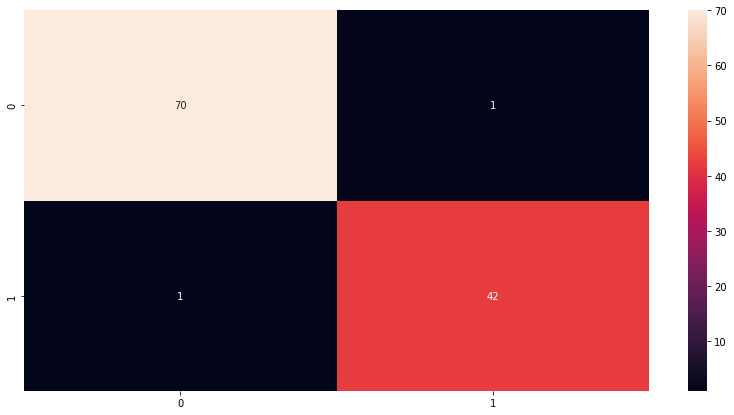

In [114]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

In [115]:
accuracy =accuracy_score(y_test, y_pred)
print('accuracy is:',accuracy)

precision =precision_score(y_test, y_pred)
print('precision is:',precision)

recall =recall_score(y_test, y_pred)
print('recall is:',recall)


accuracy is: 0.9824561403508771
precision is: 0.9767441860465116
recall is: 0.9767441860465116


In [116]:
#Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



dict_keys(['loss', 'accuracy'])


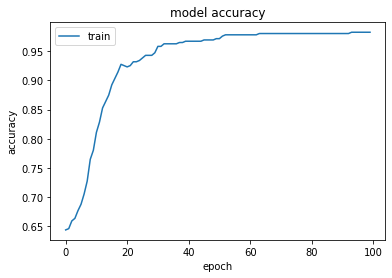

In [117]:
#Visualize Data History
print(model.history.keys())

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

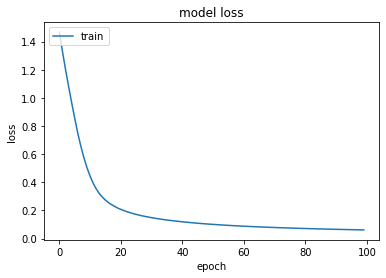

In [118]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange' ,label='roc')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('reciver operating characteristic (roc) curve')
    plt.legend()
    plt.show()

In [120]:
preds = classifier.predict(x_test)

auc=roc_auc_score(y_test,preds)
print('AUC:%0.2f'%auc)

AUC:1.00


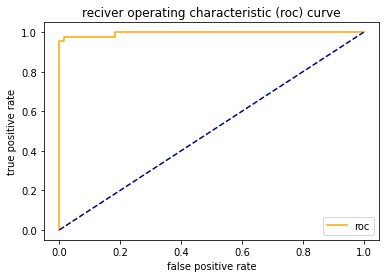

In [121]:
fpr,tpr,thresholds=roc_curve(y_test,preds)
plot_roc_curve(fpr,tpr)

In [123]:
#Area Under Curve
roc_auc_score(y_test, preds)

0.9954143465443825